# 🎯 Project Objective 
Develop a personalized playlist recommendation system based on the acoustic features of songs, aiming to suggest music that aligns with the user's emotional state.  
This app represents the first stage in building an intelligent playlist generator, combining music data analysis and unsupervised clustering techniques.

# 🔬 Methodology  
1️⃣ **Data Collection**: The dataset was obtained via Google Dataset Search, redirecting to a Kaggle source that contained over 20,000 songs with features such as valence, energy, danceability, tempo, and other acoustic variables.

2️⃣ **Data Cleaning and Preprocessing**: The dataset was cleaned by removing duplicates, handling missing values, and ensuring data consistency.

3️⃣ **Exploratory Data Analysis (EDA)**: Key variables were visualized to understand their distribution and relationships.

- *Valence* showed a relatively balanced distribution.  
- *Energy* helped distinguish between high-intensity and low-intensity songs.  
- *Danceability* and *Tempo* were analyzed together to explore how danceable and rhythmic a song is.

4️⃣ **Clustering with K-Means**: The K-Means algorithm was used to group songs into distinct musical "moods." This unsupervised technique allowed segmentation based on acoustic patterns without prior labeling.

5️⃣ **Personalized Playlist Generation**: The user selects an emotional state (e.g., happy, relaxed, melancholic), and the app recommends songs from the corresponding cluster, aligning suggestions with the identified audio features.

# Import Libraries

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display

# Load the Dataset

In [2]:
file_path = r"C:\Users\affec\Spotify Dataset\cleaned_dataset.csv"  # Full file path
df = pd.read_csv(file_path)  # Load the dataset into a DataFrame

# First Look at the Dataset

In [3]:
# Display the first rows
df.head(50)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,7.201164e+07,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8.435055e+06,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,2.117550e+08,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube
5,Gorillaz,DARE,Demon Days,album,0.760,0.891,-5.852,0.0372,0.022900,0.086900,...,Gorillaz - DARE (Official Video),Gorillaz,2.590212e+08,1844658.0,72008.0,True,True,3.238503e+08,2.989933,Spotify
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,-7.185,0.0629,0.012000,0.262000,...,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,4.519960e+05,11686.0,241.0,False,True,1.066615e+07,2.760000,Spotify
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,-5.886,0.0313,0.007990,0.081000,...,Gorillaz - She's My Collar [HQ],SalvaMuñox,1.010982e+06,17675.0,260.0,False,False,1.596059e+08,7.276786,Spotify
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,-3.340,0.0465,0.003430,0.103000,...,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,2.445982e+07,739527.0,20296.0,True,True,4.267190e+07,2.809231,Spotify
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,-7.176,0.1620,0.031500,0.081100,...,Gorillaz - Dirty Harry (Official Video),Gorillaz,1.547611e+08,1386920.0,39240.0,True,True,1.910747e+08,1.305060,Spotify


In [4]:
# View the number of rows and columns
df.shape

(20594, 24)

In [5]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

In [6]:
# View general statistics of numerical data
df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20592.000000
mean,0.620102,0.635176,-7.678254,0.096733,0.291391,0.056162,0.193653,0.530077,120.562616,3.742439,9.203740e+07,6.479902e+05,2.684679e+04,1.326446e+08,5.167227
std,0.165504,0.214274,4.639481,0.112182,0.286117,0.193622,0.168832,0.245542,29.588093,2.085211,2.726026e+08,1.773648e+06,1.911751e+05,2.423582e+08,4.117431
min,0.000000,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868000,0.035700,0.045200,0.000000,0.094100,0.340000,96.994000,2.996746,1.478284e+06,1.754200e+04,4.060000e+02,1.559098e+07,2.386190
50%,0.638000,0.666000,-6.540500,0.050650,0.193000,0.000002,0.125000,0.538000,119.959000,3.551267,1.331348e+07,1.153155e+05,3.006000e+03,4.730525e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.476750,0.000474,0.237000,0.727000,139.923500,4.202163,6.739682e+07,5.000198e+05,1.373675e+04,1.343453e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


# Data Cleaning and Preprocessing

In [7]:
# Drop columns that are not relevant for the recommendation model
columns_to_drop = ["Title", "Channel"]  
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Check the DataFrame after dropping columns
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Tempo,Duration_min,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,138.559,3.710667,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,92.761,3.336217,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,108.014,3.585833,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,120.423,3.897783,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,167.953,5.682000,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [8]:
# Check how many missing values each column has
df.isnull().sum()

# Apply median imputation to numerical columns only
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      0
most_playedon       0
dtype: int64

In [9]:
# Convertimos variables categóricas en formato "category"
categorical_columns = ["Album_type", "Licensed", "official_video", "most_playedon"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Verificamos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Artist            20594 non-null  object  
 1   Track             20594 non-null  object  
 2   Album             20594 non-null  object  
 3   Album_type        20594 non-null  category
 4   Danceability      20594 non-null  float64 
 5   Energy            20594 non-null  float64 
 6   Loudness          20594 non-null  float64 
 7   Speechiness       20594 non-null  float64 
 8   Acousticness      20594 non-null  float64 
 9   Instrumentalness  20594 non-null  float64 
 10  Liveness          20594 non-null  float64 
 11  Valence           20594 non-null  float64 
 12  Tempo             20594 non-null  float64 
 13  Duration_min      20594 non-null  float64 
 14  Views             20594 non-null  float64 
 15  Likes             20594 non-null  float64 
 16  Comments          2059

In [10]:
# Convert categorical variables to 'category' type
categorical_columns = ["Album_type", "Licensed", "official_video", "most_playedon"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Artist            20594 non-null  object  
 1   Track             20594 non-null  object  
 2   Album             20594 non-null  object  
 3   Album_type        20594 non-null  category
 4   Danceability      20594 non-null  float64 
 5   Energy            20594 non-null  float64 
 6   Loudness          20594 non-null  float64 
 7   Speechiness       20594 non-null  float64 
 8   Acousticness      20594 non-null  float64 
 9   Instrumentalness  20594 non-null  float64 
 10  Liveness          20594 non-null  float64 
 11  Valence           20594 non-null  float64 
 12  Tempo             20594 non-null  float64 
 13  Duration_min      20594 non-null  float64 
 14  Views             20594 non-null  float64 
 15  Likes             20594 non-null  float64 
 16  Comments          2059

# Exploratory Data Analysis (EDA)

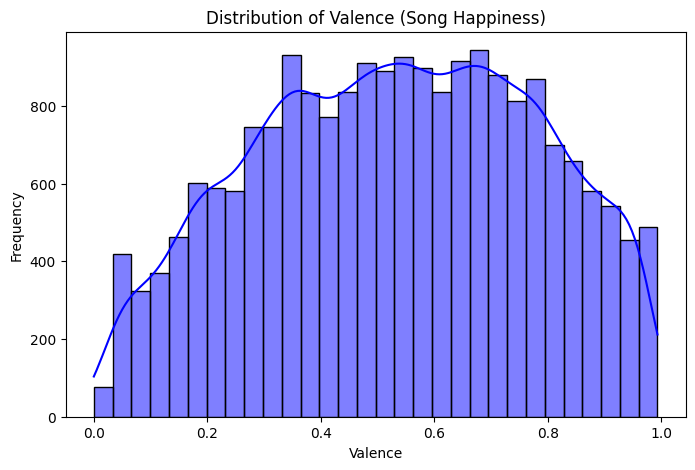

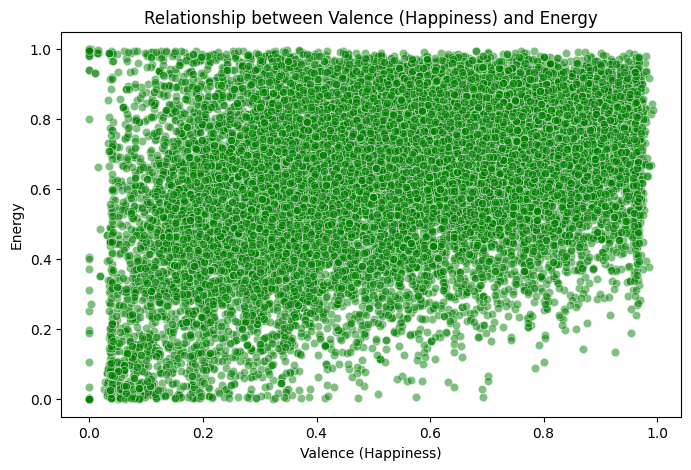

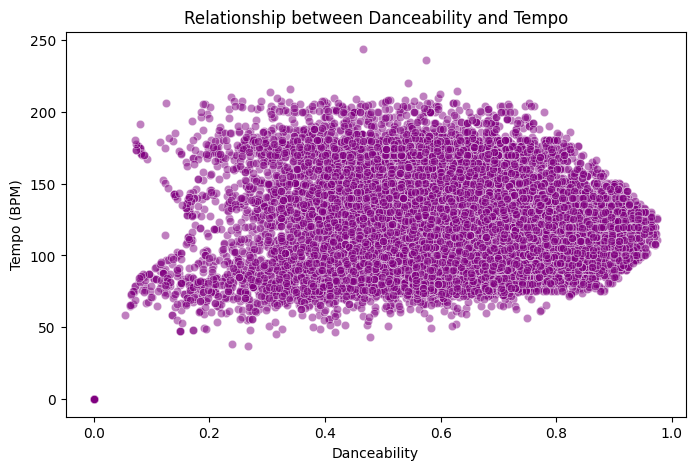

In [11]:
# Distribution of Valence (How happy are the songs?)
plt.figure(figsize=(8,5))
sns.histplot(df["Valence"], bins=30, kde=True, color="blue")
plt.title("Distribution of Valence (Song Happiness)")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

# Relationship between Energy and Valence (Are happier songs more energetic?)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Valence"], y=df["Energy"], alpha=0.5, color="green")
plt.title("Relationship between Valence (Happiness) and Energy")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Energy")
plt.show()

# Relationship between Danceability and Tempo (Are more danceable songs faster?)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Danceability"], y=df["Tempo"], alpha=0.5, color="purple")
plt.title("Relationship between Danceability and Tempo")
plt.xlabel("Danceability")
plt.ylabel("Tempo (BPM)")
plt.show()

# 📊 Graph Analysis
1️⃣ **Distribution of Valence (Happiness of Songs)**  
Valence measures how positive or happy a song feels. The distribution appears fairly balanced, with a higher density around mid-range values (~0.5–0.7). This suggests the dataset includes both joyful and more melancholic songs.

2️⃣ **Relationship between Valence and Energy**  
Energy represents the intensity and power of a song. There's no clear linear relationship, but we observe high-energy songs at different levels of happiness. This helps differentiate emotional states when generating recommendations.

3️⃣ **Relationship between Danceability and Tempo**  
Danceability refers to how easy it is to dance to a song. Tempo (BPM) influences the perception of rhythm. Most danceable songs seem to cluster around mid-range tempos, suggesting that many have a moderate BPM.

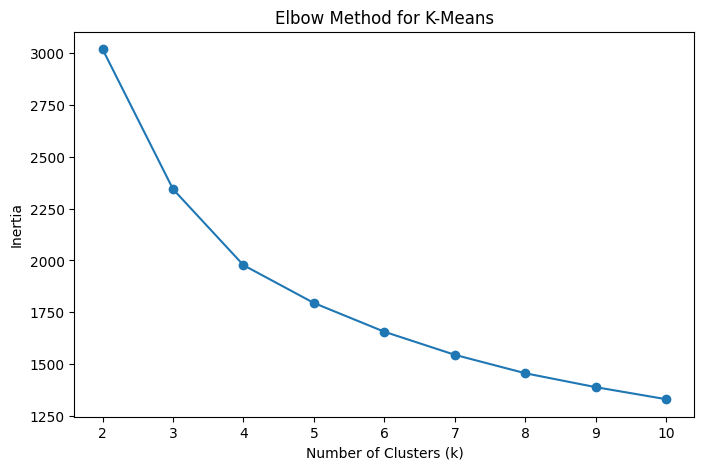

In [12]:
# 1️⃣ Select key features
features = ['Valence', 'Energy', 'Danceability', 'Tempo', 'Acousticness']
X = df[features]

# 2️⃣ Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4️⃣ Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Using K-Means to Generate Clusters

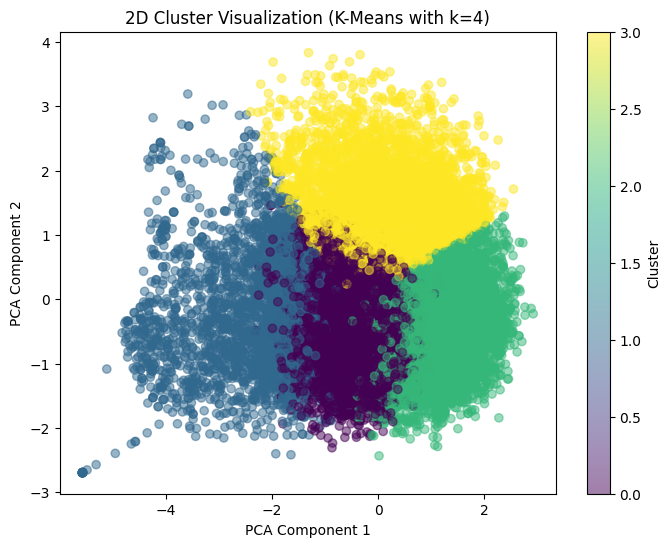

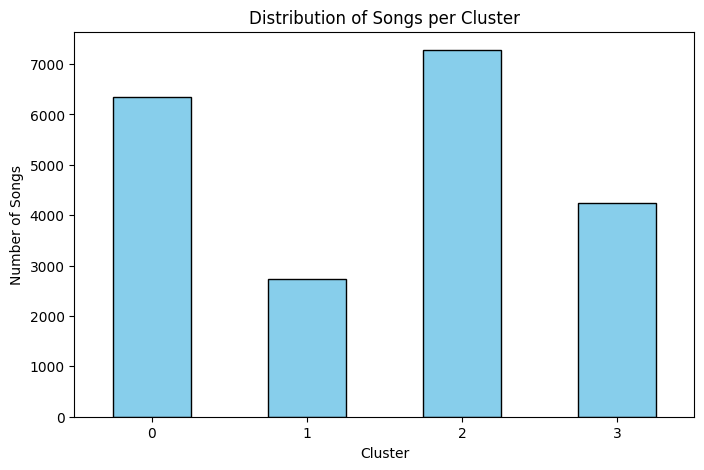

Song distribution per cluster:
Cluster
2    7277
0    6340
3    4247
1    2730
Name: count, dtype: int64


In [13]:
# Ensure we're using the correct subset of the dataset
columns_for_clustering = ['Danceability', 'Energy', 'Valence', 'Tempo']
df_clustering = df[columns_for_clustering].copy()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Cluster Visualization (K-Means with k=4)")
plt.show()


# Count the number of songs in each cluster
cluster_counts = df['Cluster'].value_counts()

# Visualize the number of songs per cluster
plt.figure(figsize=(8,5))
cluster_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.title("Distribution of Songs per Cluster")
plt.xticks(rotation=0)
plt.show()

# Print cluster distribution
print("Song distribution per cluster:")
print(cluster_counts)

In [14]:
# Analyze how audio features are distributed within each cluster
cluster_analysis = df.groupby('Cluster')[['Danceability', 'Energy', 'Valence', 'Tempo']].mean()

# Display the table in a readable format
display(cluster_analysis)

,Danceability,Energy,Valence,Tempo
Cluster,,,,
0,0.631076,0.641697,0.383401,107.161013
1,0.406877,0.281711,0.237323,107.968707
2,0.738830,0.713355,0.753914,113.223461
3,0.537346,0.718695,0.553690,161.239464


# Personalized Playlist Generator

In [15]:
# Dictionary linking emotions to their corresponding cluster
emotion_to_cluster = {
    "happiness": 2,     # 🎉 Happy and danceable songs
    "party": 2,         # 🎉 Similar to happiness
    "motivation": 3,    # 🎸 High-energy songs
    "intensity": 3,     # 🎸 Similar to motivation
    "relaxation": 1,    # 🌙 Calm and relaxing music
    "sadness": 1,       # 🌙 Similar to relaxation
    "balance": 0,       # 🎵 Balanced tracks
    "focus": 0          # 🎵 Neutral, non-distracting music
}

In [16]:
# Function to generate a personalized playlist based on user emotion
def generate_playlist(emotion, num_songs=10):
    if emotion not in emotion_to_cluster:
        print("⚠️ Emotion not recognized. Please use one of the following:", list(emotion_to_cluster.keys()))
        return None

    # Get the cluster associated with the emotion
    cluster_id = emotion_to_cluster[emotion]
    
    # Filter songs from the corresponding cluster
    cluster_songs = df[df["Cluster"] == cluster_id]
    
    # Check if there are songs available
    if len(cluster_songs) == 0:
        print(f"⚠️ No songs available for the emotion '{emotion}'.")
        return None

    # Select random songs
    playlist = cluster_songs.sample(n=min(num_songs, len(cluster_songs)), random_state=random.randint(0, 100))

    # Return selected playlist
    return playlist[['Artist', 'Track', 'Album', 'Danceability', 'Energy', 'Valence', 'Tempo']]

# 🎧 Test the recommender system with an example emotion (e.g., "happiness")
playlist_happiness = generate_playlist("happiness", num_songs=10)
playlist_happiness

,Artist,Track,Album,Danceability,Energy,Valence,Tempo
16056,Glass Animals,I Don't Wanna Talk (I Just Wanna Dance),Dreamland (+ Bonus Levels),0.703,0.624,0.808,131.966
1551,Disturbed,Inside the Fire,Indestructible (Deluxe Edition),0.463,0.962,0.660,94.003
14167,Jeremih,Changes,Changes,0.745,0.622,0.557,140.082
8830,Mario,Just a Friend 2002 - Radio Edit,Mario,0.538,0.677,0.913,132.346
858,Plan B,Es un Secreto,House Of Pleasure,0.841,0.783,0.514,94.989
13439,Nicki Minaj,Super Freaky Girl,Queen Radio: Volume 1,0.951,0.878,0.923,133.014
3243,Leo Dan,Te He Prometido,Canta Trovador,0.558,0.408,0.742,126.367
5010,Good Charlotte,I Just Wanna Live,"The Chronicles of Life and Death (""LIFE"" version)",0.803,0.830,0.935,111.033
1384,Céline Dion,That's the Way It Is,The Very Best of Celine Dion,0.634,0.886,0.577,93.040
13006,Jason Derulo,Want to Want Me,Everything Is 4,0.775,0.680,0.656,114.025


In [17]:
def display_playlist(playlist_df):
    if playlist_df is None or playlist_df.empty:
        print("⚠️ No songs to display.")
        return
    
    print("\n🎵 **Your Generated Playlist** 🎵\n")
    display(playlist_df)  # Display the table in a clear format

# Test with a sample emotion
playlist_party = generate_playlist("party", num_songs=10)
display_playlist(playlist_party)


🎵 **Your Generated Playlist** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
1936,Intocable,Alguien Te Va A Hacer Llorar,X,0.721,0.591,0.916,125.118
2768,Laura Pausini,Se fué,Laura Pausini: 25 Aniversario (Spanish Version),0.734,0.594,0.573,104.043
6509,"Grover Washington, Jr.","Take Me There (7"" Version)",In the Name of Love: The Elektra Recordings 19...,0.808,0.468,0.689,132.734
9385,Jeff Beck,Constipated Duck,Blow By Blow,0.601,0.783,0.917,96.941
8068,Badshah,Players,Players,0.833,0.678,0.576,109.969
5067,Eazy-E,Gimmie That Nutt,It's On (Dr. Dre) 187um Killa,0.947,0.854,0.775,104.076
4750,Xzibit,X,Restless,0.936,0.678,0.822,96.911
5421,Los Dareyes De La Sierra,70 Calaveras - En Vivo,70 Calaveras (En Vivo),0.720,0.853,0.945,111.992
18860,CKay,Problème,Ronisia (Version Deluxe),0.768,0.814,0.680,96.931
7386,Mano,Young Yama,Yamadonga (Original Motion Picture Soundtrack),0.792,0.773,0.649,104.967


In [18]:
# Ask the user to enter an emotion and generate the playlist
user_emotion = input("🎵 Enter the emotion for your playlist: ").strip().lower()

# Generate playlist based on user input
generated_playlist = generate_playlist(user_emotion, num_songs=10)

# Display the playlist if the emotion is valid
if generated_playlist is not None and not generated_playlist.empty:
    display_playlist(generated_playlist)
else:
    print("⚠️ Emotion not recognized. Try one of: happiness, party, motivation, intensity, relaxation, sadness, balance, or focus.")

🎵 Enter the emotion for your playlist:  hapiness


⚠️ Emotion not recognized. Please use one of the following: ['happiness', 'party', 'motivation', 'intensity', 'relaxation', 'sadness', 'balance', 'focus']
⚠️ Emotion not recognized. Try one of: happiness, party, motivation, intensity, relaxation, sadness, balance, or focus.


In [19]:
# Interactive playlist generation loop
while True:
    user_emotion = input("\n🎵 Enter the emotion for your playlist (or type 'exit' to quit): ").strip().lower()

    if user_emotion == "exit":
        print("👋 Thank you for using the playlist recommender! 🎶")
        break

    generated_playlist = generate_playlist(user_emotion, num_songs=10)

    if generated_playlist is not None and not generated_playlist.empty:
        display_playlist(generated_playlist)

        # Ask if user wants to regenerate playlist with the same emotion
        while True:
            regenerate = input("\n🔄 Do you want to generate another playlist with the same emotion? (yes/no): ").strip().lower()
            if regenerate == "yes":
                generated_playlist = generate_playlist(user_emotion, num_songs=10)
                display_playlist(generated_playlist)
            elif regenerate == "no":
                break
            else:
                print("⚠️ Invalid input. Please type 'yes' or 'no'.")
    else:
        print("⚠️ Emotion not recognized. Try one of: happiness, party, motivation, intensity, relaxation, sadness, balance, or focus.")


🎵 Enter the emotion for your playlist (or type 'exit' to quit):  party



🎵 **Your Generated Playlist** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
19721,Connor Price,SPLAT,SPLAT,0.908,0.450,0.515,108.056
13768,IU,Good day,REAL,0.637,0.882,0.552,128.027
18878,Young Cister,Caminemos de la Mano,Caminemos de la Mano,0.735,0.752,0.647,92.915
2779,Westlife,World of Our Own,World of Our Own (Expanded Edition),0.707,0.765,0.923,97.005
3503,Cypress Hill,Insane in the Brain,Black Sunday,0.897,0.611,0.769,102.304
5427,Los Acosta,Deja Una Rosa En Tu Balcón,Hasta La Eternidad (Clásicos Digitalizados),0.792,0.592,0.942,102.035
5504,Barry White,You See The Trouble With Me,Let The Music Play,0.666,0.583,0.746,114.851
4757,Xzibit,What U See Is What U Get,40 Dayz & 40 Nightz,0.724,0.806,0.586,93.863
7720,Jackson Browne,Stay - Remastered,Running on Empty (Remastered),0.603,0.765,0.720,107.068
3593,Chuck Berry,Run Rudolph Run,Rock 'N' Roll Rarities,0.681,0.715,0.957,152.132



🔄 Do you want to generate another playlist with the same emotion? (yes/no):  yes



🎵 **Your Generated Playlist** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
3460,S. Janaki,Vaa Vennila Unnaithane,Mella Thirandhadhu Kadhavu (Original Motion Pi...,0.647,0.620,0.895,79.272
702,Maná,En El Muelle De San Blas,Sueños Líquidos,0.640,0.693,0.698,97.159
9126,Raffi,Going on a Picnic,The Corner Grocery Store and Other Singable Songs,0.903,0.155,0.792,128.483
8444,Keith Urban,Throw It Back (feat. Keith Urban),Cross Country,0.794,0.733,0.521,93.932
8299,Germ,Champagne Face,DIRTIESTNASTIEST$UICIDE,0.894,0.767,0.412,144.077
5161,Gloria Estefan,Conga,Greatest Hits,0.791,0.860,0.906,122.300
15532,GIMS,Sapés comme jamais (feat. Niska) - Pilule bleue,Mon coeur avait raison,0.842,0.777,0.751,120.081
14323,Mike Posner,Please Don't Go,31 Minutes to Takeoff,0.699,0.882,0.657,120.016
6276,Diego Torres,Color Esperanza,Un Mundo Diferente,0.619,0.876,0.772,100.962
19531,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),MONTERO,0.741,0.691,0.892,150.087



🔄 Do you want to generate another playlist with the same emotion? (yes/no):  no

🎵 Enter the emotion for your playlist (or type 'exit' to quit):  exit


👋 Thank you for using the playlist recommender! 🎶


# 📌 Conclusions:

This first version of the Playlist Generator demonstrates the feasibility of generating emotion-based music recommendations using clustering techniques and acoustic features.

### 📌  Key Findings:

K-Means clustering effectively segmented songs into emotional groups without requiring explicit labels.

Variables such as **valence** and **energy** were essential for distinguishing emotions like happiness, calmness, and intensity.

Visual analysis supported the understanding of how songs naturally group based on their audio profiles.

### 📌 Design and Development Decisions:

The initial console-based interaction was replaced with a more fluid and visual web experience:

✅ A button was added to automatically generate a new playlist using the same emotion.  

✅ Another button allows users to select a different emotion and generate a new playlist accordingly.

The app is available for local testing via: [Playlist Generator](https://playlistgenerator-vwec.onrender.com/).

After developing the analysis and prototype in Jupyter Notebook, the project was migrated to **Visual Studio Code**, where a web interface was built using **Flask**, including the system’s visual design.


### 📌 Expected Impact:

Help users discover music that aligns with their emotional state in a fast and intuitive way.

Lay the foundation for future features such as automatic Spotify playlist generation and dynamic user feedback.